In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math
import random
from matplotlib.colors import ListedColormap

In [2]:
def generateData (size, numberOfClasses, dimensional = 2):
    data = []
    for classNum in range(numberOfClasses):
        center = [random.random()*5.0 for i in range(dimensional)]
        for rowNum in range(size):
            data.append(np.array([random.gauss(center[i],0.5) for i in range(dimensional)]))
    return np.array(data)

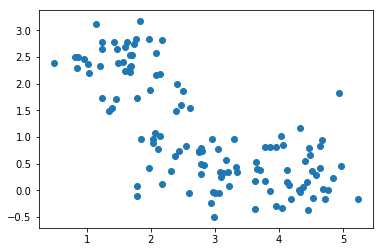

In [3]:
def showData (trainData, nClasses, nItemsInClass):
    plt.scatter([trainData[i][0] for i in range(len(trainData))],
               [trainData[i][1] for i in range(len(trainData))])
    plt.show() 
size = 40
nClasses = 3
data = generateData (size, nClasses)
showData (data, nClasses, size)

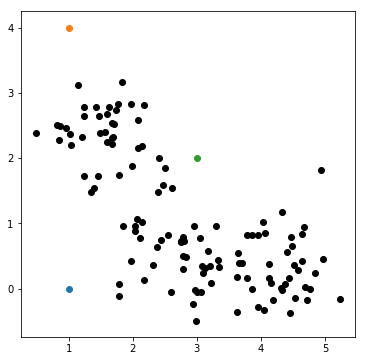

In [4]:
k = 3
centroids = [[np.random.randint(0, 5), np.random.randint(0, 5)]
    for i in range(k)]
    
fig = plt.figure(figsize=(6, 6))
plt.scatter(data[:, 0], data[:, 1], color='k')
for centr in centroids:
    plt.scatter(*centr)
plt.show()

In [5]:
def assignment (data, centroids):
    distanses = []
    for i in np.arange(len(centroids)):
        s = 0
        for j in np.arange(len(data[0])):
            s += (data[:,j] - centroids[i][j]) ** 2
        distanses.append(s)
    distanses = np.matrix(distanses)
    res = np.argmin(distanses, axis=0)
    return res

In [6]:
def update(data, centroids, min_distanses):
    for i in np.arange(len(centroids)):
        md = np.array([[el]*2 for el in min_distanses.tolist()[0]])
        condition = md == i
        tmp = np.extract(condition, data)
        tmp = np.reshape(tmp, (-1, 2))
        for j in np.arange(len(centroids[i])):
            centroids[i][j] = np.mean(tmp[:, j])
    return centroids

In [7]:
min_distanses = 0
for n in np.arange(5):
    min_distanses = assignment(data, centroids)
    for i in np.arange(len(centroids)):
        md = np.array([[el]*2 for el in min_distanses.tolist()[0]])
        condition = md == i
        tmp = np.extract(condition, data)
        tmp = np.reshape(tmp, (-1, 2))
    centroids = update(data, centroids, min_distanses)

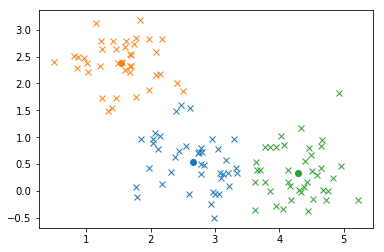

In [8]:
for i in np.arange(len(centroids)):
    md = np.array([[el]*2 for el in min_distanses.tolist()[0]])
    condition = md == i
    tmp = np.extract(condition, data)
    tmp = np.reshape(tmp, (-1, 2))
    plt.plot(tmp[:, 0],tmp[:, 1], 'x')
for centr in centroids:
    plt.scatter(*centr)